# Quantum machine learning and MPS
Let's look at Matrix Product State as a model for quantum machine learning.

## What you will learn this time.
1. MPS model
2. Optimisation calculation

## Install Blueqat
Install Blueqat using pip.

In [1]:
!pip install blueqat

dwave-cloud-client 0.7.2 has requirement click>=7.0, but you'll have click 6.7 which is incompatible.
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


The model we are going to make is called MPS.  
Quantum circuit is following.

```
|0> --*--
      |
|0> --*--*--
         |
|0> -----*--*--
            |
|0> --------*----[M]
```

This circuit uses one-qubit rotating gates and two-qubit gates, CX.  
For more information,

```
|0> --Rx-Ry-Rz--*--
                |
|0> --Rx-Ry-Rz--X--Rx-Ry-Rz--*--
                             | 
|0> ---------------Rx-Ry-Rz--X--Rx-Ry-Rz--*--
                                          |
|0> ----------------------------Rx-Ry-Rz--X----[M]
```

Place the Rx, Ry, Rz gates and CX gates.

First, load the tool.

In [6]:
from blueqat import Circuit
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline

Set up the hyper parameters.

In [7]:
np.random.seed(45)

#Steps of optimization
nsteps = 5000

#Number of parameters to optimize
nparams = 18

#Fineness of numerical differentiation
h = 0.01

#Learning rate
e = 0.01

#Initial parameter
ainit = [np.random.rand()*np.pi*2 for i in range(nparams)]

#List for storing results
arr = []

#1 for training, 2 for reasoning.
mode = 1

In [16]:
def mpsZ(a,ran,mode=1):
    
    #Input circuit
    init = [Circuit(4).x[0,1],Circuit(4).x[2,3],Circuit(4).x[0],Circuit(4).x[1],Circuit(4).x[2],Circuit(4).x[0,2]]
    #Target label
    target = [1,1,-1,-1,-1,1]
   
    #Buliding circuit
    u = init[ran]
    u.rx(a[0])[0].ry(a[1])[0].rz(a[2])[0]
    u.rx(a[3])[1].ry(a[4])[1].rz(a[5])[1]    
    u.rx(a[6])[2].ry(a[7])[2].rz(a[8])[2]
    u.rx(a[9])[3].ry(a[10])[3].rz(a[11])[3]
    u.cx[0,1]
    u.rx(a[12])[1].ry(a[13])[1].rz(a[14])[1]
    u.cx[1,2]
    u.rx(a[15])[2].ry(a[16])[2].rz(a[17])[2]
    u.cx[2,3]
        
    #Take expectation value
    full = u.run()
    expt = sum(np.abs(full[:8])**2)-sum(np.abs(full[8:])**2)
    
    #full = u.m[3].run(shots=nshots)
    #expt = (full['0000'] - full['0001'])/nshots
    
    if(mode ==1):
        #Returns the error between the expected value and the label.
        return (expt - target[ran])**2
    else:
        return expt

Let's start. Each time the gradient is calculated, the data is randomly selected from 0 to 3 and optimized.

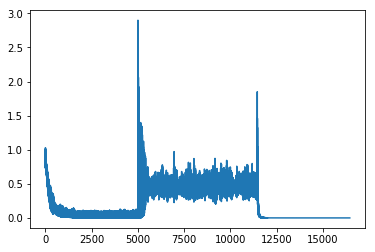

85.52928733825684


In [17]:
start = time.time()

for i in range(nsteps):
    it = np.random.randint(0,3)
    
    loss = mpsZ(ainit,it)
    arr.append(loss)
    atemp = [0 for i in range(nparams)]
    
    for j in range(nparams):
        aa = ainit.copy()
        aa[j] += h
        atemp[j] = ainit[j] - e*(mpsZ(aa,it) - loss)/h

    ainit = atemp

plt.plot(arr)
plt.show()
print(time.time() - start)

I'd like to check it out as it converged nicely.

In [18]:
mpsZ(ainit,4,mode=2)

-0.9971247051492784

In [19]:
mpsZ(ainit,5,mode=2)

0.9976075247345314